<a href="https://colab.research.google.com/github/moemag/Image-Mosaics/blob/main/Image%20Mosaics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image
import matplotlib.image as mpimg
from math import hypot, pi, cos, sin, ceil
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import RectBivariateSpline


In [ ]:
img_src1 = '/Users/Adham/Desktop/Assignment 2/image1.jpg'
img_src2 = '/Users/Adham/Desktop/Assignment 2/image2.jpg'
img1 = cv2.imread(img_src1, 1)
img2 = cv2.imread(img_src2, 1)

In [ ]:
def click_event(event, x, y, flags, param):
    # checking for left mouse clicks
    if event == cv2.EVENT_LBUTTONDOWN:
        posImg.append([x,y])
        cv2.circle(param["img"],(x,y), 4,(255,0,0),-1)
        cv2.imshow(param["image"], param["img"])


In [ ]:
### This cell is used for mouse clicks

# posImg = []
# img1 = cv2.imread(img_src1, 1)
# param1 = {"image" : "image1", "img" : img1}
# cv2.imshow('image1', img1)
# cv2.setMouseCallback('image1', click_event, param1)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# clicksOfImg1 = np.array(posImg)

# print('-------------IMG1--------------')
# print(clicksOfImg1)

# posImg = []
# img2 = cv2.imread(img_src2, 1)
# param2 = {"image" : "image2", "img" : img2}
# cv2.imshow('image2', img2)
# cv2.setMouseCallback('image2', click_event, param2)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# clicksOfImg2 = np.array(posImg)

# print('-------------IMG2--------------')
# print(clicksOfImg2)

# img1 = cv2.imread(img_src1, 1)
# img2 = cv2.imread(img_src2, 1)

In [ ]:
#the following values were obtained from mouse clicks, copied and stored for multiple execution trials

clicksOfImg1 = np.array([
                [ 556, 319], [ 556, 336], [ 558, 401], [530, 509], [516, 558], [ 534, 596], [478, 307], [480, 349],
                [ 471, 468], [ 451, 468], [ 445, 531], [442, 558], [442, 577], [ 420, 616], [374, 291], [318, 461],
                [ 295, 460], [ 325, 530], [ 365, 557], [315, 590], [180, 501], [ 103, 499], [111, 571], [103, 614]])

clicksOfImg2 = np.array([
                [1017, 333], [1015, 353], [1023, 422], [999, 537], [999, 588], [1013, 627], [924, 327], [929, 372],
                [ 932, 495], [ 910, 496], [ 907, 553], [906, 589], [906, 610], [ 887, 652], [812, 319], [773, 494],
                [ 750, 494], [ 780, 564], [ 826, 590], [776, 629], [638, 538], [ 565, 539], [578, 608], [575, 649]])



In [ ]:
def getHMatrix(p, pDash):
    A = np.zeros((2*len(p), 9))
    k = 0
    for i in range(len(p)):
        A[k] = [-p[i][0], -p[i][1], -1, 0, 0, 0, p[i][0]*pDash[i][0], p[i][1]*pDash[i][0], pDash[i][0]]
        A[k+1] = [0 ,0, 0, -p[i][0], -p[i][1], -1, p[i][0]*pDash[i][1], p[i][1]*pDash[i][1], pDash[i][1]]
        k = k + 2
    _, _, VT = np.linalg.svd(A)
    H = np.reshape(VT[-1:], (3, 3))
    H = H/H[2][2]
    return A, H


A, H = getHMatrix(clicksOfImg1, clicksOfImg2)


[1012.0, 333.0] ------> [1017  333]
[1014.0, 350.0] ------> [1015  353]
[1023.0, 418.0] ------> [1023  422]
[1002.0, 535.0] ------> [999 537]
[990.0, 588.0] ------> [999 588]
[1015.0, 629.0] ------> [1013  627]
[925.0, 328.0] ------> [924 327]
[931.0, 370.0] ------> [929 372]
[931.0, 493.0] ------> [932 495]
[909.0, 494.0] ------> [910 496]
[908.0, 561.0] ------> [907 553]
[907.0, 589.0] ------> [906 589]
[909.0, 609.0] ------> [906 610]
[888.0, 651.0] ------> [887 652]
[815.0, 322.0] ------> [812 319]
[769.0, 493.0] ------> [773 494]
[746.0, 493.0] ------> [750 494]
[781.0, 563.0] ------> [780 564]
[824.0, 589.0] ------> [826 590]
[775.0, 624.0] ------> [776 629]
[638.0, 538.0] ------> [638 538]
[568.0, 538.0] ------> [565 539]
[578.0, 607.0] ------> [578 608]
[572.0, 649.0] ------> [575 649]


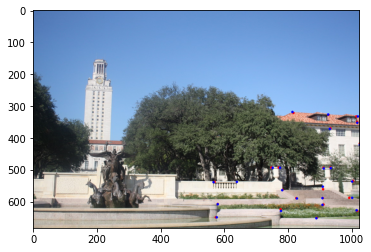

In [ ]:
#comparing clicks of image 2 with points of image 1 obtained from H matrix

pointsOfImg1= np.hstack((clicksOfImg1, np.ones((len(clicksOfImg1), 1))))

for i in range(len(clicksOfImg1)):
    xDash , yDash , W  = np.dot(H, pointsOfImg1[i])
    print([xDash/W//1, yDash/W//1], '------>', clicksOfImg2[i])
    cv2.circle(img2, (int(xDash/W//1), int(yDash/W//1)), 4,(0,0,255), -1)
    cv2.circle(img2, (clicksOfImg2[i,0], clicksOfImg2[i,1]), 4,(255,0,0), -1)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()

# cv2.imshow('image2', img2)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

img2 = cv2.imread(img_src2, 1)


In [ ]:
def getMinMaxAxis (a, b, c, d):

    minX = min(a[0], b[0], c[0], d[0])
    maxX = max(a[0], b[0], c[0], d[0])
    minY = min(a[1], b[1], c[1], d[1])
    maxY = max(a[1], b[1], c[1], d[1])

    return minX , maxX , minY , maxY

In [ ]:
def divideByWandRound(point):
    if point[2]!=1:
        point[0] = (point[0]/point[2])
        point[1] = (point[1]/point[2])
        point[2] = (point[2]/point[2])

    point[0]= round(point[0])
    point[1]= round(point[1])
    point[2]= round(point[2])
    return point


In [ ]:
#### take into consideration that for homogrpahy calculations [x,y,1] is actually placed as [y,x] in the 2D matrix.
def getNewboundaries (h,N,M):
    a= [0,0,1]
    aDash  = np.dot(h,a)
    aDash = divideByWandRound(aDash)
    aDash[1] = checkHeightLimit(aDash,img1.shape[0])
    print("old value of a = ", a, "new value = ", aDash)

    b=[0,N-1,1]
    bDash = np.matmul(h,b )
    bDash = divideByWandRound(bDash)
    bDash[1] = checkHeightLimit(bDash,img1.shape[0])
    print("old value of b = ", b, "new value = ", bDash)

    c=[M-1,0,1]
    cDash = np.matmul(h,c )
    cDash = divideByWandRound(cDash)
    cDash[1] = checkHeightLimit(cDash,img1.shape[0])
    print("old value of c= ", c, "new value = ", cDash)

    d=[M-1,N-1,1]
    dDash = np.matmul(h,d)
    dDash = divideByWandRound(dDash)
    dDash[1] = checkHeightLimit(dDash,img1.shape[0])
    print("old value of d = ", d, "new value = ", dDash)

    return aDash, bDash, cDash, dDash


In [ ]:
#we limit the size of the output image height to the original images height.

def checkHeightLimit(point, M):
    if point[1]<0:
        point[1]=0
    if point[1]>M:
        point[1]=M-1
    return point[1]


In [ ]:
def warpImage(src_img, params, h_inv):
    #prepare x and y arrays for interpolation
    #image 2 because inverse warping is made so that we get image 2 pixel values.
    x = np.arange(0, src_img.shape[0], 1)
    y = np.arange(0, src_img.shape[1], 1)

    minX      = params['minX']
    minY      = params['minY']
    newWidth  = params['newWidth']
    newHeight = params['newHeight']
    rows      = params['rows']
    cols      = params['cols']

    new_img_red   = np.zeros((src_img.shape[0], newHeight+src_img.shape[1]))
    new_img_blue  = np.zeros((src_img.shape[0], newHeight+src_img.shape[1]))
    new_img_green = np.zeros((src_img.shape[0], newHeight+src_img.shape[1]))

    interpolation_spline_blue  = RectBivariateSpline(x.reshape(-1,1), y.reshape(-1,1), src_img[:, :, 0])
    interpolation_spline_green = RectBivariateSpline(x.reshape(-1,1), y.reshape(-1,1), src_img[:, :, 1])
    interpolation_spline_red   = RectBivariateSpline(x.reshape(-1,1), y.reshape(-1,1), src_img[:, :, 2])

    ##start warping loop
    for i in range (int(minX), int(minX+newWidth), 1):

        for j in range (int(minY), int((minY+newHeight)), 1):

            pDash  = [i, j, 1]
            point = np.matmul(h_inv, pDash)
            point = divideByWandRound(point)
            xi = point[0]
            yi = point[1]

            if (xi >= 0 and yi >= 0):
                if(i < newHeight + src_img.shape[1]):

                    new_img_red[j][i] = int(interpolation_spline_red.ev(yi, xi))
                    new_img_blue[j][i] = int(interpolation_spline_blue.ev(yi, xi))
                    new_img_green[j][i] = int(interpolation_spline_green.ev(yi, xi))

            else:
                new_img_red[j][i]   = 0
                new_img_green[j][i] = 0
                new_img_blue[j][i]  = 0

    #initialize the new image that will sticth the two images and the merge the bgr warped channels.

    new_img = np.zeros((src_img.shape[0],src_img.shape[1]+newHeight,3), 'uint8')
    new_img[:, :, 0] = new_img_blue
    new_img[:, :, 1] = new_img_green
    new_img[:, :, 2] = new_img_red

    return new_img

In [ ]:
def performWarping(h,src):

    a,b,c,d = getNewboundaries(h,src.shape[0],src.shape[1])

    # the solution is in the following format
    ## col, row
    ## x,y

    minX , maxX , minY, maxY = getMinMaxAxis (a,b,c,d)
    print("minY =", minY , "maxY = ", maxY ,"minX = ", minX,"maxX=", maxX)

    newHeight = int(round(abs(maxY - minY)))
    newWidth = int(round(abs(maxX- minX)))
    print("Number of columns =",newWidth)
    print("Number of rows =",newHeight)

    #start by giving the the warping fns each of the following:
     ## minX and minY => to determine starting point of the warpd image in the dst image.
     ##newHeight and newWidth => to determine the size of the warped image in the dst image.

    params = {'minX': minX, 'minY': minY, 'newWidth' : newWidth, 'newHeight' : newHeight,
                  'rows' : src.shape[0], 'cols' : src.shape[1]+newHeight}


    #compute inverse homography
    h_inv = np.linalg.inv(h)

    new_img = warpImage(src,params,h_inv)

    return new_img


In [ ]:
def stitchImages(src,dst):
    src[0:dst.shape[0],0:dst.shape[1]]= dst
    return src


old value of a =  [0, 0, 1] new value =  [467. 108.   1.]
old value of b =  [0, 682, 1] new value =  [484. 682.   1.]
old value of c=  [1023, 0, 1] new value =  [1.572e+03 0.000e+00 1.000e+00]
old value of d =  [1023, 682, 1] new value =  [1.719e+03 6.820e+02 1.000e+00]
minY = 0.0 maxY =  682.0 minX =  467.0 maxX= 1719.0
Number of columns = 1252
Number of rows = 682


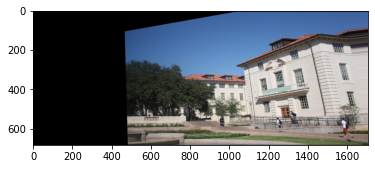

In [ ]:
new_img = performWarping(H,img1)

#plot the warped image
plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))
plt.show()

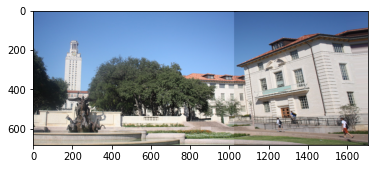

In [ ]:
stichedImg= stitchImages(new_img,img2)
plt.imshow(cv2.cvtColor(stichedImg, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
cv2.imshow('stiched', stichedImg)
cv2.waitKey(0)
cv2.destroyAllWindows()